In [1]:
# Load Our Dataset
import pandas as pd
df = pd.read_csv('http://hackveda.in/sistec/Housing_Modified.csv')
df.head(3)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no


In [2]:
# Cleaning , Standardization , Normalization
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

df.driveway = lb.fit_transform(df.driveway)
df.recroom = lb.fit_transform(df.recroom)
df.fullbase = lb.fit_transform(df.fullbase)
df.gashw = lb.fit_transform(df.gashw)
df.airco = lb.fit_transform(df.airco)
df.prefarea = lb.fit_transform(df.prefarea)

#One Hot Encoding -> dummy_variables
# pandas --> get_dummies
df_stories = pd.get_dummies(df['stories'],prefix='stories')
#df_stories


df = pd.concat([df , df_stories] , axis=1)

del df['stories']
df.head(3)

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_four,stories_one,stories_three,stories_two
0,42000.0,5850,3,1,1,0,1,0,0,1,0,0,0,0,1
1,38500.0,4000,2,1,1,0,0,0,0,0,0,0,1,0,0
2,49500.0,3060,3,1,1,0,0,0,0,0,0,0,1,0,0


In [3]:
# Correlation 
# VIF 
import statsmodels.api as sm
sm.graphics.plot_corr(df.corr(),xnames=list(df.columns))


<Figure size 640x480 with 2 Axes>

In [4]:
df.corr()

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_four,stories_one,stories_three,stories_two
price,1.000000,0.535796,0.366447,0.516719,0.297167,0.254960,0.186218,0.092837,0.453347,0.383302,0.329074,0.372281,-0.270058,0.138254,-0.002089
lotsize,0.535796,1.000000,0.151851,0.193833,0.288778,0.140327,0.047487,-0.009201,0.221765,0.352872,0.234782,0.178354,0.054348,0.020567,-0.159612
bedrooms,0.366447,0.151851,1.000000,0.373769,-0.011996,0.080492,0.097201,0.046028,0.160412,0.139117,0.078953,0.145525,-0.509974,0.099150,0.377424
bathrms,0.516719,0.193833,0.373769,1.000000,0.041955,0.126892,0.102791,0.067365,0.184955,0.178178,0.064013,0.281003,-0.250784,0.036027,0.080982
driveway,0.297167,0.288778,-0.011996,0.041955,1.000000,0.091959,0.043428,-0.011942,0.106290,0.203682,0.199378,0.115453,-0.053249,0.073533,-0.047074
recroom,0.254960,0.140327,0.080492,0.126892,0.091959,1.000000,0.372434,-0.010119,0.136626,0.038122,0.161292,0.067567,-0.022632,-0.038733,0.006938
fullbase,0.186218,0.047487,0.097201,0.102791,0.043428,0.372434,1.000000,0.004677,0.045248,0.052524,0.228651,-0.165285,0.059154,-0.132540,0.098694
gashw,0.092837,-0.009201,0.046028,0.067365,-0.011942,-0.010119,0.004677,1.000000,-0.130350,0.068144,-0.059170,-0.062416,-0.060336,0.072922,0.054823
airco,0.453347,0.221765,0.160412,0.184955,0.106290,0.136626,0.045248,-0.130350,1.000000,0.156596,0.115626,0.298887,-0.143174,0.110682,-0.074706
garagepl,0.383302,0.352872,0.139117,0.178178,0.203682,0.038122,0.052524,0.068144,0.156596,1.000000,0.092364,0.126112,0.016610,-0.079170,-0.041931


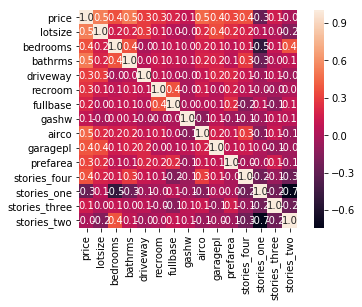

In [5]:
# Seaborn 
import seaborn as sns
sns.heatmap(df.corr(), square=True,annot=True , fmt='.1f')

In [6]:
#Create a list of Independent Variables
independent_variables = ['lotsize','bedrooms','bathrms',
                        'driveway','recroom','fullbase',
                        'gashw','airco','garagepl','prefarea',
                        'stories_one','stories_two',
                        'stories_three','stories_four']
independent_variables

['lotsize',
 'bedrooms',
 'bathrms',
 'driveway',
 'recroom',
 'fullbase',
 'gashw',
 'airco',
 'garagepl',
 'prefarea',
 'stories_one',
 'stories_two',
 'stories_three',
 'stories_four']

In [7]:
# VIF

import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor 

X = df[independent_variables]  # independent variables
y = df['price'] # dependent variable

thresh = 10

for i in np.arange(0,len(independent_variables)):
    vif = [variance_inflation_factor(X[independent_variables].values,ix)
          for ix in range(X[independent_variables].shape[1])]
    maxloc = vif.index(max(vif))  # store the index of max vif 
    if max(vif) > thresh:   # comparing the max vif with our thresh
        print('VIF : ',vif)
        print('dropping : ',X[independent_variables].columns[maxloc],
              'at index : ',maxloc)
        del independent_variables[maxloc]
    else:
        break
        
print('Final Independent Variables : ',independent_variables)
    

VIF :  [1.3704738112004569, 1.5783268259718808, 1.298777972870559, 1.1648811574651847, 1.214862009319293, 1.3369114662383514, 1.053078869775805, 1.2195823546735252, 1.218832929061305, 1.181239434106175, 11.781465345739338, 17.220894903652624, 3.9436985684475445, 4.544836339845972]
dropping :  stories_two at index :  11
VIF :  [9.027672411240845, 12.40877864989557, 9.374682124313626, 6.79426994395169, 1.4753724454932147, 2.055797712632684, 1.1031283327561414, 1.785054332017555, 1.9607784997238857, 1.5317205065647905, 1.8969940907498246, 1.278600527923588, 1.4546157757803122]
dropping :  bedrooms at index :  1
Final Independent Variables :  ['lotsize', 'bathrms', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'stories_one', 'stories_three', 'stories_four']


In [8]:
# Evaluate Our Model
# OLS

independent_variables = ['lotsize', 'bathrms', 'driveway', 'recroom', 
                         'fullbase', 'gashw', 'airco', 'garagepl', 
                         'prefarea', 'stories_one', 'stories_three', 
                         'stories_four']

from sklearn.model_selection import train_test_split

X = df[independent_variables]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.80,random_state=1)

print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (436, 12)
X_test (110, 12)
y_train (436,)
y_test (110,)


C:\Users\Public\Jyothsna\Python\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [9]:
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
# https://www.xlstat.com/en/solutions/features/ordinary-least-squares-regression-ols

lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     760.6
Date:                Sat, 27 Apr 2019   Prob (F-statistic):          5.22e-278
Time:                        16:01:23   Log-Likelihood:                -4819.9
No. Observations:                 436   AIC:                             9664.
Df Residuals:                     424   BIC:                             9713.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
lotsize           3.7699      0.388      9.708

In [10]:
# OLS

independent_variables = ['lotsize', 'bathrms', 'driveway', 
                         'fullbase', 'gashw', 'airco', 'garagepl', 
                         'prefarea', 'stories_one', 'stories_three', 
                         'stories_four']

from sklearn.model_selection import train_test_split

X = df[independent_variables]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.80,random_state=1)

print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (436, 11)
X_test (110, 11)
y_train (436,)
y_test (110,)


C:\Users\Public\Jyothsna\Python\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     828.0
Date:                Sat, 27 Apr 2019   Prob (F-statistic):          4.34e-279
Time:                        16:01:23   Log-Likelihood:                -4820.8
No. Observations:                 436   AIC:                             9664.
Df Residuals:                     425   BIC:                             9708.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
lotsize           3.8087      0.388      9.826

In [12]:
# OLS

independent_variables = ['lotsize', 'bathrms', 'driveway', 
                         'fullbase', 'gashw', 'airco', 'garagepl', 
                         'prefarea', 'stories_three', 
                         'stories_four']

from sklearn.model_selection import train_test_split

X = df[independent_variables]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.80,random_state=1)

print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (436, 10)
X_test (110, 10)
y_train (436,)
y_test (110,)


C:\Users\Public\Jyothsna\Python\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     896.9
Date:                Sat, 27 Apr 2019   Prob (F-statistic):          5.10e-279
Time:                        16:01:23   Log-Likelihood:                -4824.5
No. Observations:                 436   AIC:                             9669.
Df Residuals:                     426   BIC:                             9710.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
lotsize           3.5098      0.374      9.383

In [16]:
# Predict House Price

lotsize = int(input('Enter Lotsize : '))
bathrms = int(input('Enter Bathrooms : '))
driveway = int(input('Enter Driveway : '))
fullbase = int(input('Enter Fullbase : '))
gashw = int(input('Enter Gas Hot Water : '))
airco = int(input('Enter Air Condition : '))
garagepl = int(input('Enter Garage : '))
prefarea = int(input('Enter Preference Area : '))
stories_three = int(input('Enter Story Three : '))
stories_four = int(input('Enter Story Four : '))

data = {'lotsize':lotsize, 'bathrms':bathrms, 'driveway':driveway, 'fullbase':fullbase,
       'gashw':gashw, 'airco':airco, 'garagepl':garagepl, 'prefarea':prefarea,
       'stories_three':stories_three, 'stories_four':stories_four}

df_input = pd.DataFrame(data,index=[0],columns=['lotsize','bathrms','driveway','fullbase',
                                     'gashw','airco','garagepl','prefarea',
                                     'stories_three','stories_four'])

predict_price = lm.predict(df_input)
print('\nPredicted Price of House is : ',predict_price[0])

Enter Lotsize : 4200
Enter Bathrooms : 1
Enter Driveway : 1
Enter Fullbase : 0
Enter Gas Hot Water : 0
Enter Air Condition : 0
Enter Garage : 0
Enter Preference Area : 0
Enter Story Three : 1
Enter Story Four : 0

Predicted Price of House is :  60217.409239154076
